# Проект "Разведывательный анализ данных"
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Описание модели
### В датасете представлены следующие данные:
1 school — аббревиатура школы, в которой учится ученик <br />
2 sex — пол ученика ('F' - женский, 'M' - мужской) <br />
3 age — возраст ученика (от 15 до 22) <br />
4 address — тип адреса ученика ('U' - городской, 'R' - за городом) <br />
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3) <br />
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно) <br />
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) <br />
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) <br />
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) <br />
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) <br />
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое) <br />
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое) <br />
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) <br />
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) <br />
15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0) <br />
16 schoolsup — дополнительная образовательная поддержка (yes или no) <br />
17 famsup — семейная образовательная поддержка (yes или no) <br />
18 paid — дополнительные платные занятия по математике (yes или no) <br />
19 activities — дополнительные внеучебные занятия (yes или no) <br />
20 nursery — посещал детский сад (yes или no) <br />
21 higher — хочет получить высшее образование (yes или no) <br />
22 internet — наличие интернета дома (yes или no) <br />
23 romantic — в романтических отношениях (yes или no) <br />
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо) <br />
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого) <br />
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много) <br />
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо) <br />
28 absences — количество пропущенных занятий <br />
29 score — баллы по госэкзамену по математике <br />

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import t

In [197]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('stud_math.csv')

In [198]:
display(df.head())
display(df.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

None

### Dataset

#### Инфо
Dataset содержит 395 строк, 17 строкоовых и 13 числовых столбцов. Некоторые поля имеют пустые значения.


# Первичная обработка данных

Приведем название столбцов к нижнему регистру

In [199]:
columns = df.columns

columns = [x.lower() for x in columns]
df.columns = columns

### Удаление лишьних полей
В наборе присутствует столбец "studytime, granular", который не описан в модели. Анализируя данные в данном столбце, можно сделать вывод, что значения в нем получены путем умножения -3 на значение в столбеце studytime. Поэтому будет целесообразно его удалить, так как он полностью коррелирован с studytime.

In [200]:
df.drop(['studytime, granular'], inplace=True, axis=1)

### Строковые значения
Некоторые строковые поля имею значение 'NaN', заменим это значением 'None'. У нас нет возможности заполнить пропущенные значения.

In [201]:
def set_none(column):
    if(df[column].dtype == 'O'):
        df[column] = df[column].apply(lambda x: None if pd.isnull(x) else x)

In [202]:
for col in df.columns:
    set_none(col)

In [203]:
display(df.head())
display(df.info())

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       378 non-null object
famsize       368 non-null object
pstatus       350 non-null object
medu          392 non-null float64
fedu          371 non-null float64
mjob          376 non-null object
fjob          359 non-null object
reason        378 non-null object
guardian      364 non-null object
traveltime    367 non-null float64
studytime     388 non-null float64
failures      373 non-null float64
schoolsup     386 non-null object
famsup        356 non-null object
paid          355 non-null object
activities    381 non-null object
nursery       379 non-null object
higher        375 non-null object
internet      361 non-null object
romantic      364 non-null object
famrel        368 non-null float64
freetime      384 non-null float64
goout         387 non-null float64
heal

None

## Числовых данных
В наборе 12 числовых столбцов. В некоторых из них (medu,fedu, traveltime и др) есть пустые значения. Пропущенные значения можно заменить например, на средние, но это повлияет на корреляцию.
Так как pandas при расчете корреляций исключает пустые значения, то мы оставим данные поля как есть.


### Устранение выбросов

Текущая задача - убедиться в отсутствии выбросов и аномальные значения. Если выбросы и аномальные значения будут обнаружены, придется удалить эти значения.
Числовых признаков ровно 12, поэтому построим 12 гистограмм: 6 строк по 2 столбца.

In [204]:
def show_hist(_columns):
    col_count = 2
    row_count = 6
    fig, axes = plt.subplots(row_count, col_count, figsize=(16, 20))
    plt.subplots_adjust(wspace=0.1, hspace=0.7)
    number = 0

    for column in _columns:
        if(df[column].dtype != 'O'):
            median = df[column].median()
            mmin = df[column].min()
            mmax = df[column].max()
            perc25 = df[column].quantile(0.25)
            perc75 = df[column].quantile(0.75)
            iqr = perc75 - perc25
            liqr = perc25 - 1.5 * iqr
            riqr = perc75 + 1.5 * iqr
            bins = 100
            row = number // col_count
            col = number % col_count

            axes[row, col].hist(df[column].loc[df[column].between(
                liqr, riqr)], bins=bins, range=(mmin, mmax), label='IQR')
            axes[row, col].hist(df[column].loc[(df[column] < liqr) | (
                df[column] > riqr)], alpha=0.5, bins=bins, range=(mmin, mmax), label='Выбросы')

            axes[row, col].set_title('{column}\n Min: {min}, Max: {max}, \n25-й перцентиль: {perc25}, 75-й перцентиль: {perc75}, IQR: {iqr}, \nГраницы выбросов: [{liqr}, {riqr}]'.format(
                column=column, min=mmin, max=mmax, perc25=perc25, perc75=perc75, iqr=iqr, liqr=liqr, riqr=riqr))

            axes[row, col].legend(loc=0)

            number += 1

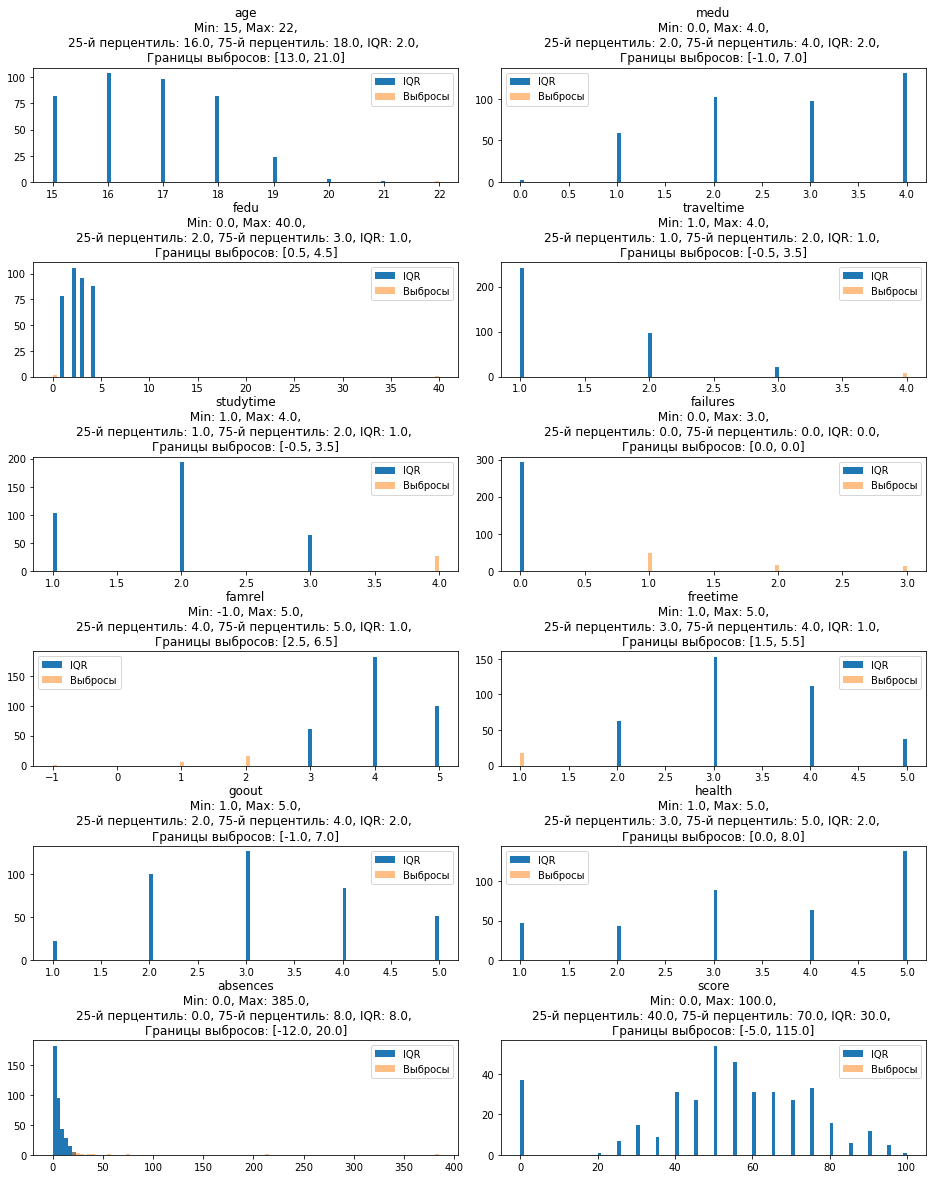

In [205]:
show_hist(df.columns)

Так как все поля кроме [‘absences’, ‘age’, ‘score’] являются группировкой других значений, то выбросы по ним можем оценить только по допустимым значениям. 
Аномальные значения, не соответствующие смыслу столбцов, в которых они хранятся, наблюдаются в следующих колонках:
<li>fedu (образование отца) - значения должны быть в пределах от 1 до 4;
<li>famrel (семейные отношения) - значения должны быть от 1 до 5;
<li>failures (количество внеучебных неуда) - значения должны быть от 0 до 2, <b>Тут есть еще одно замечание, если рассматривать условие для данного поля, то при полном соблюдении условия, данное поле не несет в себе никакого смысла. Но мы предположим, что описание не полное и список неудач при опросе не превышал 2;</b><br/>
    
Заменим аномальные данные данных полей на ‘NaN’ для исключения при расчете корреляции.


In [206]:
df.fedu = df.fedu.apply(lambda x: np.nan if x < 1 or x > 4 else x)

df.famrel = df.famrel.apply(lambda x: np.nan if x < 1 or x > 5 else x)

df.failures = df.failures.apply(lambda x: np.nan if x < 0 or x > 2 else x)

Согласно формуле интерквартильного расстояния поля [‘absences’, ‘age’] имеют выбросы: 
<li> ‘absences’ - границы выбросов: [-12, 20];
<li> ‘age’- границы выбросов: [13, 21];<br/>
    
    
Заменим аномальные данные для данных полей на ‘NaN’ для исключения при расчете корреляции.


In [207]:
def del_pollution(_columns):
    for column in _columns:
        if(df[column].dtype != 'O'):
            median = df[column].median()
            mmin = df[column].min()
            mmax = df[column].max()
            perc25 = df[column].quantile(0.25)
            perc75 = df[column].quantile(0.75)
            iqr = perc75 - perc25
            liqr = perc25 - 1.5 * iqr
            riqr = perc75 + 1.5 * iqr

            df[column] = df[column].apply(
                lambda x: np.nan if x < liqr or x > riqr else x)

In [208]:
del_pollution(['absences', 'age'])

Поле ‘score’ хоть и не имеет выбросов и запрещенных значений, но содержит нулевые значения. Так как вероятность получить 0 баллов при сдаче экзамена крайне мала, то мы предположим, что данные ученики либо не сдавали экзамен, либо результат экзаменов неизвестен. Поскольку нашей задачей является оценить влияние других параметров на результат экзаменов, то 0 значения для данного поля являются аномальными.<br/>

Заменим аномальные данные для данного полея на ‘NaN’ для исключения при расчете корреляции.

In [209]:
df.score = df.score.apply(lambda x: np.nan if x == 0 else x)

**Вывод:** После обработки выбросов и аномальных значений нет.

## Анализ и преобразование номинативных переменных

In [210]:
def show_nominative(column):
    if(df[column].dtype == 'O'):
        print('Колонка {column}: Уникальных значений - {unic_value}, значений, встретившихся в столбце более 10 раз - {more10}'
              .format(column=column, unic_value=df[column].value_counts().count(), more10=(df[column].value_counts() > 10).sum()))
        display(df[column].value_counts(dropna=False))

In [211]:
for col in df.columns:
    show_nominative(col)

Колонка school: Уникальных значений - 2, значений, встретившихся в столбце более 10 раз - 2


GP    349
MS     46
Name: school, dtype: int64

Колонка sex: Уникальных значений - 2, значений, встретившихся в столбце более 10 раз - 2


F    208
M    187
Name: sex, dtype: int64

Колонка address: Уникальных значений - 2, значений, встретившихся в столбце более 10 раз - 2


U      295
R       83
NaN     17
Name: address, dtype: int64

Колонка famsize: Уникальных значений - 2, значений, встретившихся в столбце более 10 раз - 2


GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

Колонка pstatus: Уникальных значений - 2, значений, встретившихся в столбце более 10 раз - 2


T      314
NaN     45
A       36
Name: pstatus, dtype: int64

Колонка mjob: Уникальных значений - 5, значений, встретившихся в столбце более 10 раз - 5


other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: mjob, dtype: int64

Колонка fjob: Уникальных значений - 5, значений, встретившихся в столбце более 10 раз - 5


other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

Колонка reason: Уникальных значений - 4, значений, встретившихся в столбце более 10 раз - 4


course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64

Колонка guardian: Уникальных значений - 3, значений, встретившихся в столбце более 10 раз - 3


mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

Колонка schoolsup: Уникальных значений - 2, значений, встретившихся в столбце более 10 раз - 2


no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

Колонка famsup: Уникальных значений - 2, значений, встретившихся в столбце более 10 раз - 2


yes    219
no     137
NaN     39
Name: famsup, dtype: int64

Колонка paid: Уникальных значений - 2, значений, встретившихся в столбце более 10 раз - 2


no     200
yes    155
NaN     40
Name: paid, dtype: int64

Колонка activities: Уникальных значений - 2, значений, встретившихся в столбце более 10 раз - 2


yes    195
no     186
NaN     14
Name: activities, dtype: int64

Колонка nursery: Уникальных значений - 2, значений, встретившихся в столбце более 10 раз - 2


yes    300
no      79
NaN     16
Name: nursery, dtype: int64

Колонка higher: Уникальных значений - 2, значений, встретившихся в столбце более 10 раз - 2


yes    356
NaN     20
no      19
Name: higher, dtype: int64

Колонка internet: Уникальных значений - 2, значений, встретившихся в столбце более 10 раз - 2


yes    305
no      56
NaN     34
Name: internet, dtype: int64

Колонка romantic: Уникальных значений - 2, значений, встретившихся в столбце более 10 раз - 2


no     240
yes    124
NaN     31
Name: romantic, dtype: int64

Тринадцать полей ['romantic', 'internet', 'higher', 'nursery', 'activities', 'paid', 'famsup', 'schoolsup', 'pstatus', 'address', 'famsize', 'sex', 'school'] помимо неизвестных значений содержат всего по два уникальных значения. Для расчета корреляции мы можем преобразовать их в числовое значение, например: 1 и 0. Произвольно для каждого уникального значения выберем либо 0, либо 1. Преобразуем все поля кроме 'school', так как аббревиатура школы не может быть параметром модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика. Вообще удалим этот столбец.

In [212]:
def to_numeric(column, one, zero):
    if(df[column].dtype == 'O'):
        df[column] = df[column].apply(lambda x: None if x == None else 1 if x.strip(
        ) == one else 0 if x.strip() == zero else x)


to_numeric('schoolsup', 'yes', 'no')
to_numeric('internet', 'yes', 'no')
to_numeric('romantic', 'yes', 'no')
to_numeric('higher', 'yes', 'no')
to_numeric('famsup', 'yes', 'no')
to_numeric('paid', 'yes', 'no')
to_numeric('activities', 'yes', 'no')
to_numeric('nursery', 'yes', 'no')
to_numeric('pstatus', 'T', 'A')
df.drop(['school'], inplace=True, axis=1)  # to_numeric('school', 'GP', 'MS')
to_numeric('sex', 'M', 'F')
to_numeric('famsize', 'GT3', 'LE3')
to_numeric('address', 'U', 'R')

# Корреляционный анализ

Так как признаков довольно много, будем решать задачу не методом исключения признаков по признаку корреляции друг с другом, а по признаку коррекляции с ключевым полем (score). Во-первых, отберем те признаки, которые коррелируют с ключевым полем, а во-вторых, выберем среди них слабокоррелированные между собой.

### Количественные признаки
Построим матрицу коэффициентов корреляций количественных признаков.

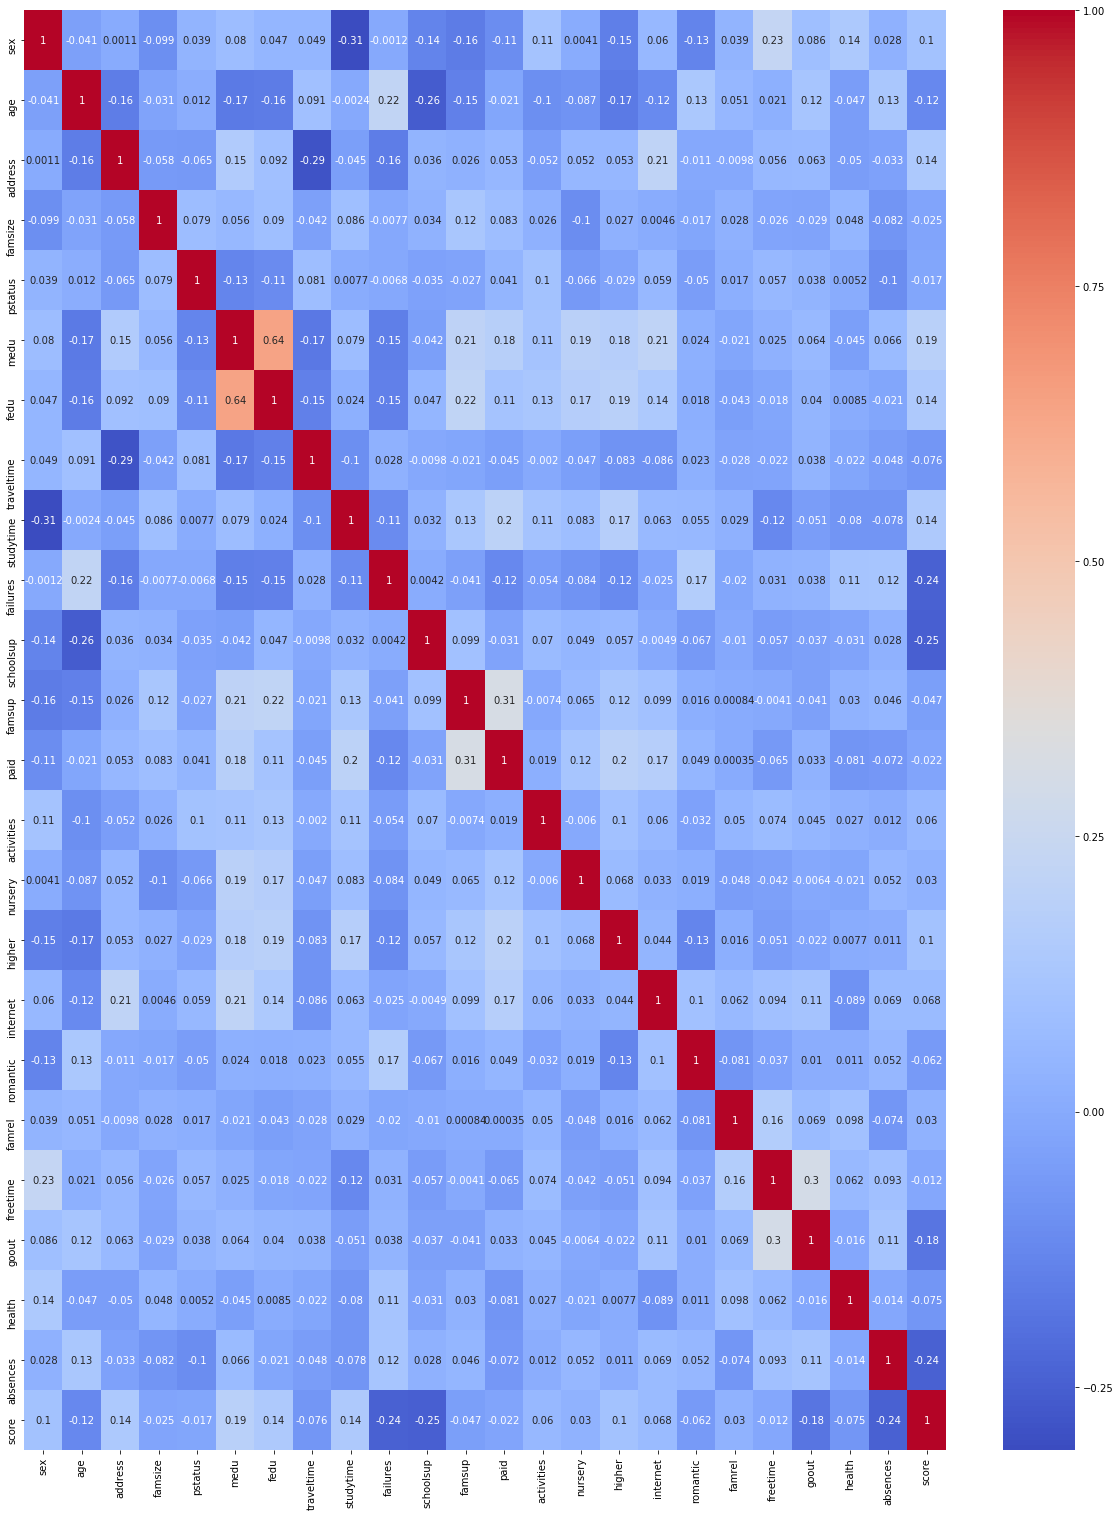

In [213]:
correlation = df.corr()

fig = plt.figure(figsize=(16, 20))
axes = fig.add_axes([0, 0, 1, 1])
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes)

Для оценки значимости коэффициента корреляции воспользуемся формулой: 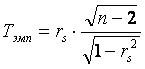
и напишем процедуру оценки значимости коэффициента корреляции. Данная процедура вернет список полей коэффициент корреляции которых статистически значим.


In [214]:
def coor_good(_columns, main_colum, alpha=0.1):
    coor_colums = []
    for column in _columns:
        if(df[column].dtype != 'O' and column != main_colum):
            n = df[df[main_colum].notna() & df[column].notna()].score.count()
            r = np.abs(df.corr()[main_colum][column])
            tt = np.abs(t.ppf(alpha / 2, n - 2))
            T = r * ((np.sqrt(n - 2) / np.sqrt(1 - np.power(r, 2))))
            if(T > tt):
                coor_colums.append(column)
    return coor_colums

In [215]:
numeric_columns = coor_good(df.columns, 'score', alpha=0.05)
print(numeric_columns)

['age', 'address', 'medu', 'fedu', 'studytime', 'failures', 'schoolsup', 'goout', 'absences']


Мы получили 9 параметров, корреляция которых статистически значима с уровнем доверия 95%:

<li>age</li>
<li>address</li>
<li>medu</li>
<li>fedu</li>
<li>studytime</li>
<li>failures</li>
<li>schoolsup</li>
<li>goout</li>
<li>absences</li>

Мы видим, что еще два параметра не попавшие в список, но коэффициент корреляции, которых сильно отличается от остальных не попавших в список [‘sex’, ’higher’].
Проверим их на более низком уровне доверия 90%.

In [222]:
numeric_columns = coor_good(df.columns, 'score', alpha=0.1)
print(numeric_columns)

['sex', 'age', 'address', 'medu', 'fedu', 'studytime', 'failures', 'schoolsup', 'higher', 'goout', 'absences']


На уровне доверия 90% эти параметры попали в список. Мы оставим эти параметры, они могут использоваться в бедующей модели для составления вычисляемых параметров.


**Вывод:** Наша выборка содержит параметры, которые коррелируют с ключевым полем 'score':<br />
        <li>sex</li>
        <li>age</li>
        <li>address</li>
        <li>medu</li>
        <li>fedu</li>
        <li>studytime</li>
        <li>failures</li>
        <li>schoolsup</li>
        <li>higher</li>
        <li>goout</li>
        <li>absences</li>
        

# Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения баллов в зависимости от значения этих переменных. Для номинативных признаков будем использовать боксплоты.

In [217]:
def show_boxplots(_columns):
    col_count = 2
    row_count = 2
    fig, axes = plt.subplots(row_count, col_count, figsize=(16, 20))

    number = 0
    for column in _columns:
        if (df[column].dtype == 'O'):
            row = number // col_count
            col = number % col_count
            sns.boxplot(x=column, y='score', data=df, ax=axes[row, col])
            number += 1

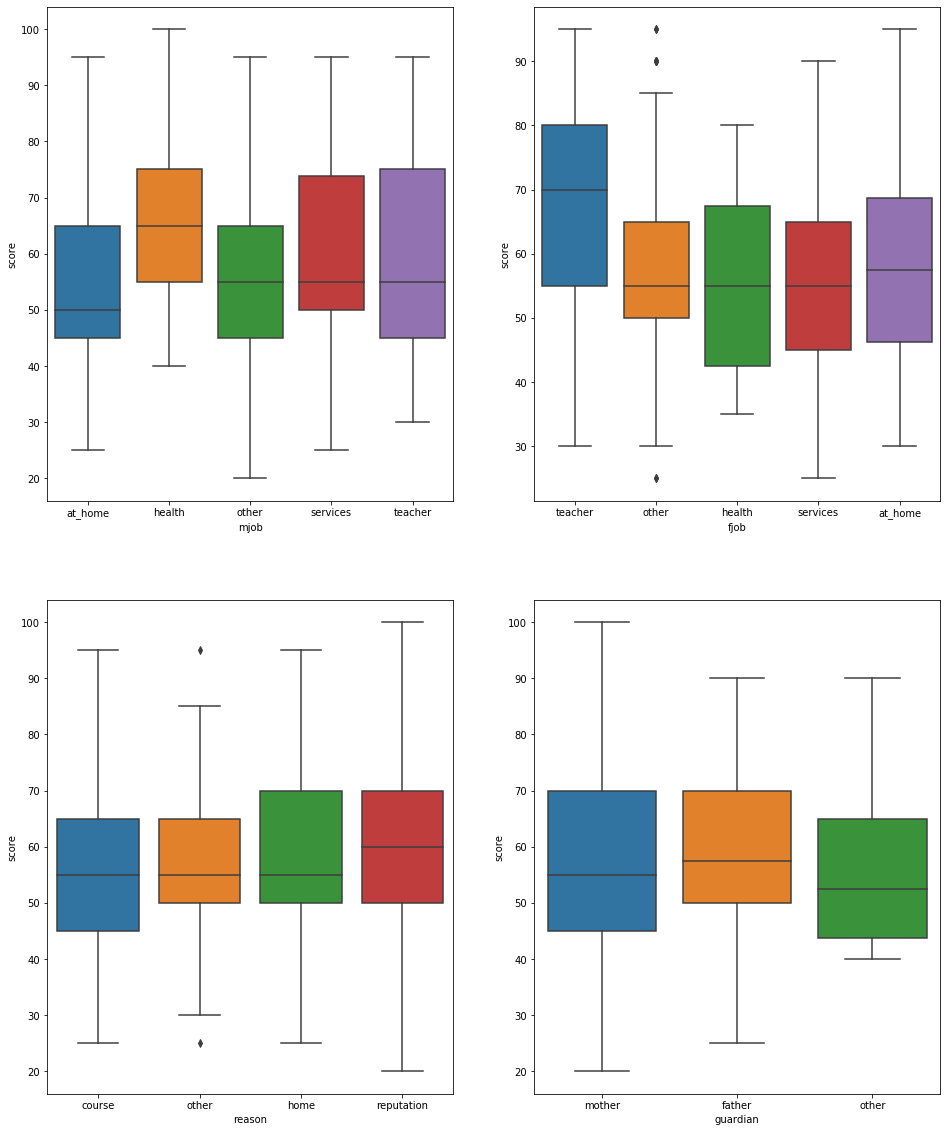

In [218]:
show_boxplots(df.columns)

По графикам похоже, что параметры ['mjob', 'fjob'], могут влиять на баллы за экзамен. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов по различным параметрам неразличимы:

In [219]:
def get_stat_dif(_columns, main_column):
    temp_df = df[df[main_column].notna()]
    stats_column = []
    for column in _columns:
        if (temp_df[column].dtype == 'O'):
            cols = temp_df.loc[:, column].value_counts().index[:]
            combinations_all = list(combinations(cols, 2))
            for comb in combinations_all:
                if ttest_ind(temp_df.loc[temp_df.loc[:, column] == comb[0], main_column],
                             temp_df.loc[temp_df.loc[:, column] == comb[1], main_column]).pvalue <= 0.05 / len(combinations_all):  # Учли поправку Бонферони
                    print('Найдены статистически значимые различия для колонки', column)
                    stats_column.append(column)
                    break
    return stats_column

In [220]:
numinative_columns = get_stat_dif(df.columns, 'score')

Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки fjob


**Вывод:** Как мы видим, серьёзно отличаются два параметра:
        <li>mjob</li>
        <li>fjob</li>

### Отберем из всей выборке только коррелирующие с score признаки

In [221]:
main_columns = numeric_columns + numinative_columns

df = df.loc[:, main_columns + ['score']]
df.head()

,sex,age,address,medu,fedu,studytime,failures,schoolsup,higher,goout,absences,mjob,fjob,score
0,0,18.0,1.0,4.0,4.0,2.0,0.0,1.0,1.0,4.0,6.0,at_home,teacher,30.0
1,0,17.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,3.0,4.0,at_home,other,30.0
2,0,15.0,1.0,1.0,1.0,2.0,NaN,1.0,1.0,2.0,10.0,at_home,other,50.0
3,0,15.0,1.0,4.0,2.0,3.0,0.0,0.0,1.0,2.0,2.0,health,None,75.0
4,0,16.0,1.0,3.0,3.0,2.0,0.0,0.0,1.0,2.0,4.0,other,other,50.0


# Выводы разведывательного анализа

# В результате EDA для анализа влияния данных о студентах на результат экзаменов по математике были получены следующие выводы:

   <li> В данных достаточно мало пустых значений.</li>
   <li> Выбросы найдены только в столбцах ['absences', 'age'], а в полях ['fedu', 'famrel', 'failures', 'score'] были аномальные значения.</li>
   <li> Выборка содержит 13 параметров, которые коррелируют с основным параметром..</li>
   <li> Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это: ['sex', 'age', 'address', 'medu', 'fedu', 'studytime', 'failures', 'schoolsup', 'higher', 'goout', 'absences', 'mjob', 'fjob'].</li>
